In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Food supply projections used in the Dashboard use UN population growth estimations for the 2020-2100 period.
These can be found in CSV format here: https://population.un.org/wpp/Download/Standard/CSV/

In this notebook we read the CSV tables and write easier to manage numpy arrays to be read by the Dashboard script. We utilize world population to scale UK food supply data with the aim to show the effect of dietary choices on global scale atmospheric indicators.

Population estimates are separated into 9 different *variants* for different combinations of fertility, mortality and international migration (which has different effects on different regions but cancels out at the *world* level).
The values used here come from the *median* variant which assumes median fertility and mortality.

In [2]:
pop = pd.read_csv('../../data/population/WPP2019_TotalPopulationBySex.csv')
pop.head()

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
0,4,Afghanistan,2,Medium,1950,1950.5,4099.243,3652.874,7752.117,11.874
1,4,Afghanistan,2,Medium,1951,1951.5,4134.756,3705.395,7840.151,12.009
2,4,Afghanistan,2,Medium,1952,1952.5,4174.450,3761.546,7935.996,12.156
3,4,Afghanistan,2,Medium,1953,1953.5,4218.336,3821.348,8039.684,12.315
4,4,Afghanistan,2,Medium,1954,1954.5,4266.484,3884.832,8151.316,12.486


In [3]:
variants = ['Medium',
            'High',
            'Low',
            'Constant fertility',
            'Instant replacement',
            'Zero migration',
            'Constant mortality',
            'No change',
            'Momentum'
           ]

# First variant has estimated data from 1950 to 2019 but we are only interested in the 1961-2018 range
years = np.arange(2020,2101)
years_past = np.arange(1961, 2020)
world_pop = np.zeros((len(variants), len(years)))

past_pop = np.array(1000 * pop[(pop['LocID'] == 900) & (pop['VarID'] == 2)]['PopTotal'][11:70])
world_pop[0] = 1000 * pop[(pop['LocID'] == 900) & (pop['VarID'] == 2)]['PopTotal'][70:]

# The rest of the variants show only projections for 2020-2100 and do not repeat past estimated data 
for ivar in range(1,len(variants)):
    # VarID starts at 2
    world_pop[ivar] = 1000*pop[(pop['LocID'] == 900) & (pop['VarID'] == ivar + 2)]['PopTotal']


Text(0, 0.5, 'Population')

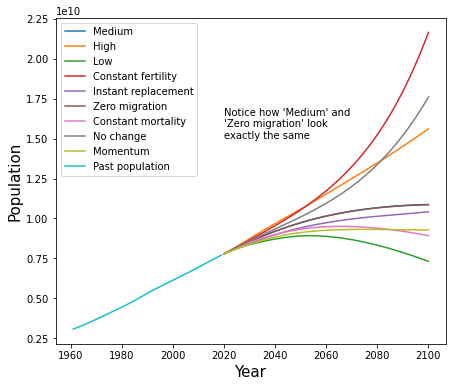

In [4]:
plt.figure(figsize=(7,6))
for ivar, var in enumerate(variants):
    plt.plot(years, world_pop[ivar], label=var)
    
plt.text(2020, 1.5e10, """Notice how 'Medium' and 
'Zero migration' look 
exactly the same""")
plt.plot(years_past, past_pop, label = 'Past population')
plt.legend()
plt.xlabel('Year', size=15)
plt.ylabel('Population', size=15)

In [5]:
median_world_pop = pop[(pop['Location']=='World') & (pop['Variant']=='Medium')][['LocID', 'Time', 'PopTotal']]
median_world_pop_estimation = median_world_pop[median_world_pop['Time'] < 2020]
median_world_pop_projection = median_world_pop[median_world_pop['Time'] >= 2020]

In [6]:
median_world_pop_estimation.tail(2)

,LocID,Time,PopTotal
277313,900,2018,7631091.113
277314,900,2019,7713468.205


In [7]:
median_world_pop_projection.head()

,LocID,Time,PopTotal
277315,900,2020,7794798.729
277316,900,2021,7874965.732
277317,900,2022,7953952.577
277318,900,2023,8031800.338
277319,900,2024,8108605.255


In [8]:
median_world_pop_estimation.to_csv('../../pyourfood/population/data/UN_world_1950_2019.csv')
median_world_pop_projection.to_csv('../../pyourfood/population/data/UN_world_2020_2100.csv')